In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

- id_num-唯一ID
- program_id-程序的ID
- program_type-程序类型
- program_duration-计划持续时间（天）
- test_id-测试ID
- test_type-测试类型（离线/在线）
- 难度级别-测试难度级别
- trainee_id-学员的ID
- 性别-受训者性别
- 教育-学员的教育水平
- city_tier-实习生居住城市的等级
- 年龄-受训者年龄
- 总计划招收-总课程的学生通过实习
- is_handicapped-受训者是否患有残疾？
- 学员参与度-讲师/教学助理为课程提供学员参与度
- is_pass 0-测试失败，1-测试通过

In [2]:
raw_data = pd.read_csv('./data/train/train.csv')
raw_data.info()
raw_data.shape

# 查看基础数据的信息
# 查看数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
id_num                       49998 non-null object
program_type                 49267 non-null object
program_id                   49299 non-null object
program_duration             49323 non-null float64
test_id                      49273 non-null float64
test_type                    49296 non-null object
difficulty_level             49295 non-null object
trainee_id                   49259 non-null float64
gender                       49291 non-null object
education                    49296 non-null object
city_tier                    49298 non-null float64
age                          30619 non-null float64
total_programs_enrolled      49306 non-null float64
is_handicapped               49280 non-null object
trainee_engagement_rating    49226 non-null float64
is_pass                      49998 non-null int64
dtypes: float64(7), int64(1), object(8)
memory usage: 6.1+ MB


(49998, 16)

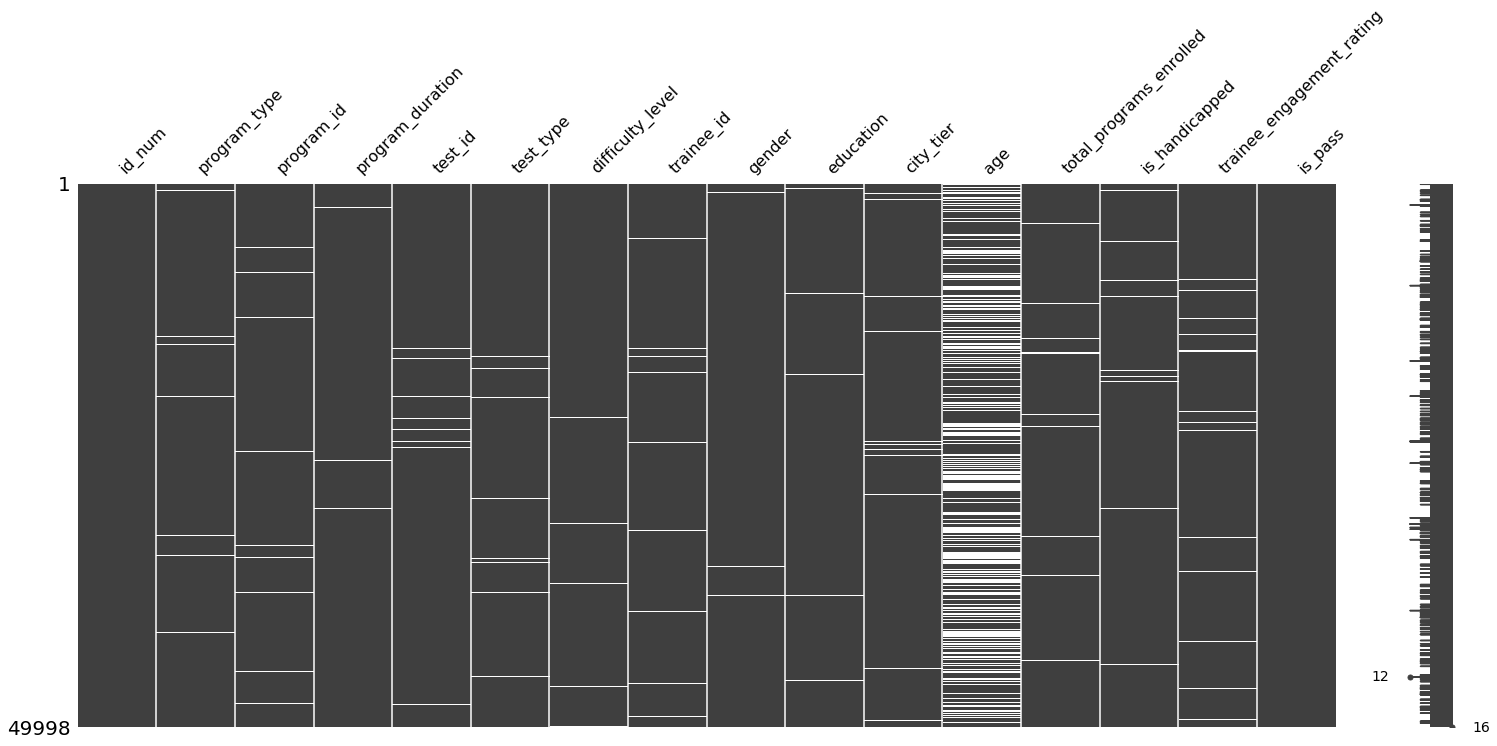

In [3]:
msno.matrix(raw_data)
# 查看数据的缺失情况

In [4]:
# 由上图知
# 除年龄的数据缺失较多之外，其他的数据缺失都比较少
# 为了保留更多的数据
# 接下来对age的数据进行填充

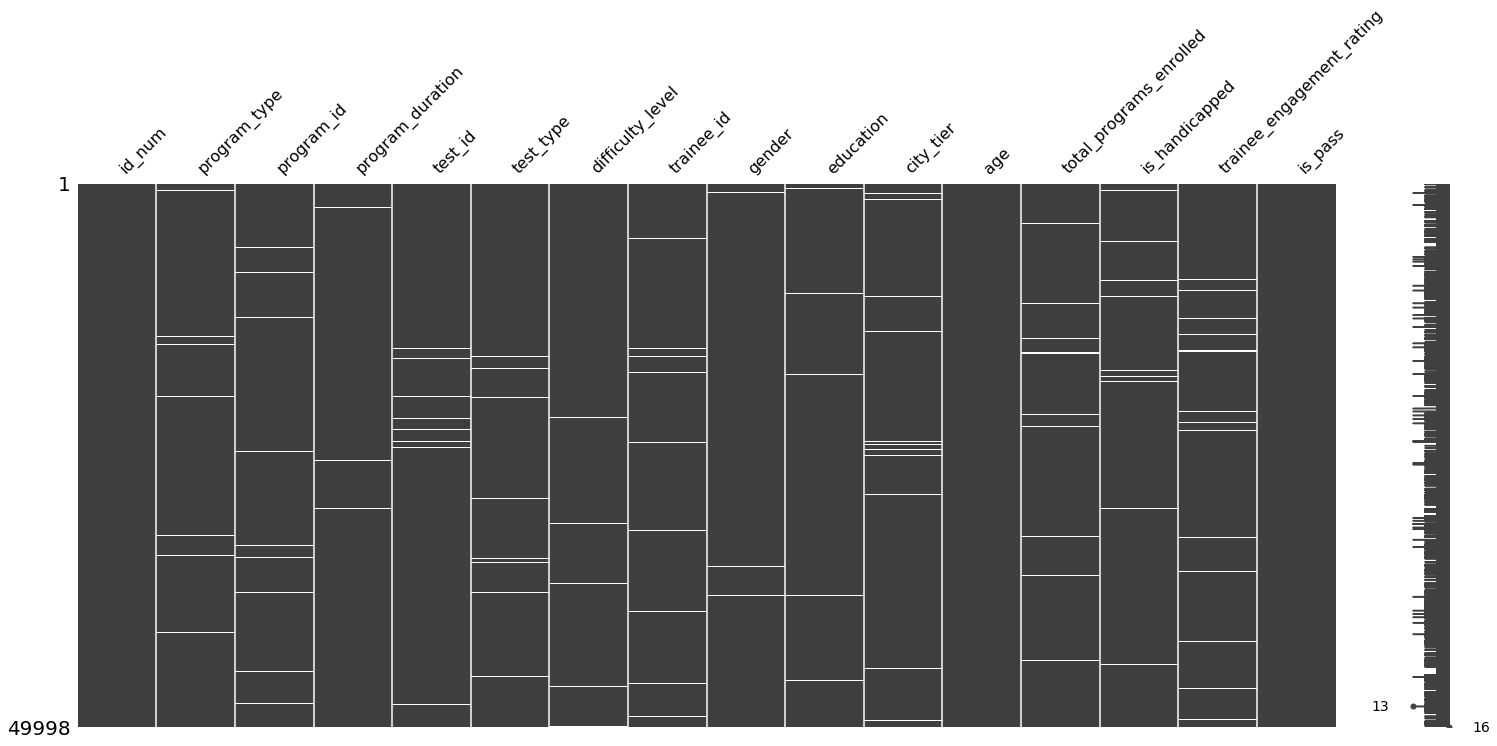

In [5]:
raw_data['age'] = raw_data['age'].fillna(raw_data['age'].mean())
msno.matrix(raw_data)
# 用mean()填充平均值
# 我们再次构图，来查看数据的缺失情况

In [6]:
# 由于别的列数没有很多缺失数据
# 这里直接对他们进行删除
# 少数据总优于胡乱填充数据
raw_data = raw_data.dropna(axis=0, how='any')

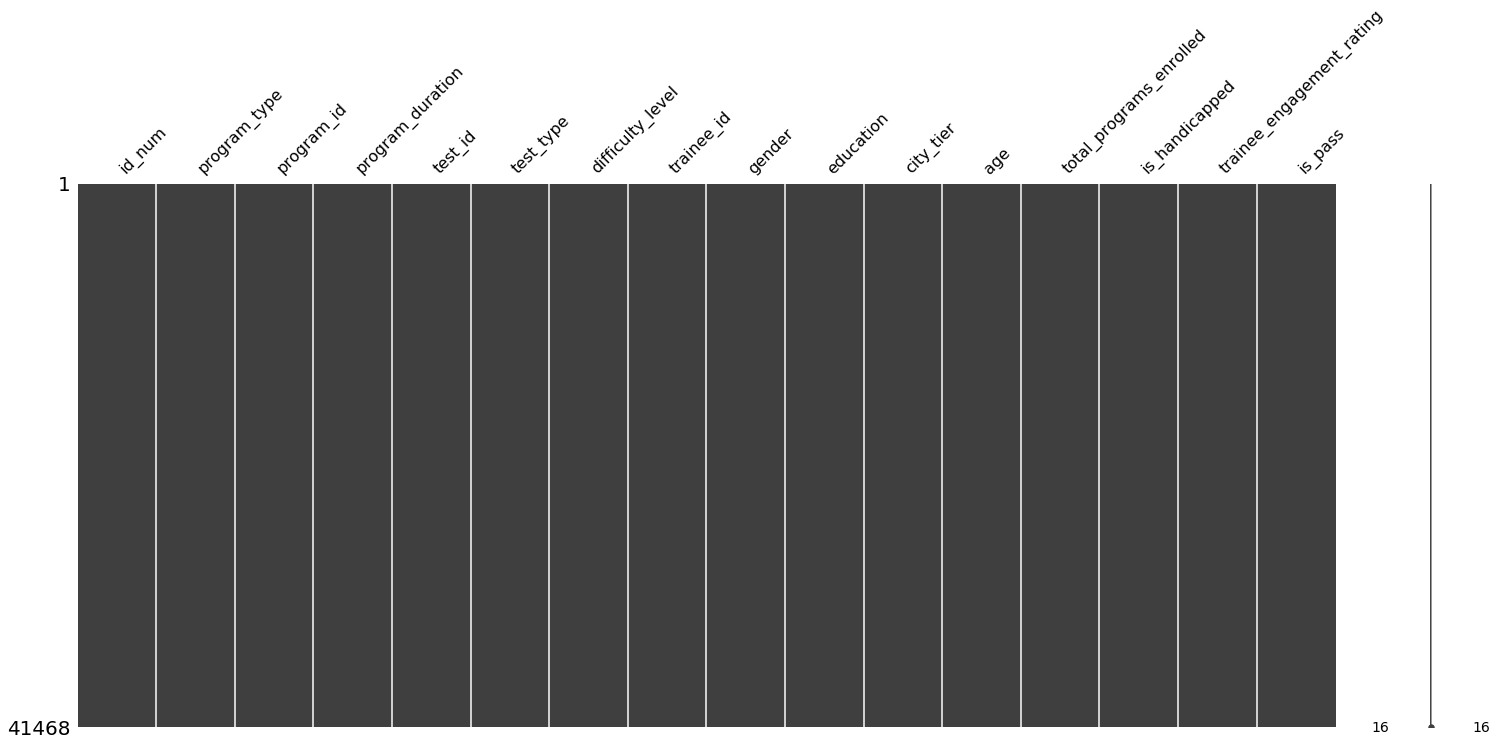

In [7]:
msno.matrix(raw_data)
# 现在可以看到数据已经全部是完整的

In [8]:
# 分开标签数据和特征数据
target = raw_data['is_pass']
feature = raw_data.drop(['is_pass'], axis =1)

In [9]:
# 确认删除了最后一列赋给到target
# 也查看数据现在的行列（大小）
feature = feature.drop('id_num', axis =1)
feature = feature.drop('trainee_id', axis =1)
feature = feature.drop('test_type', axis =1)
feature = feature.drop('gender', axis =1)
feature = feature.drop('is_handicapped',axis =1)
feature = feature.drop('test_id',axis =1)
feature = feature.drop('program_id',axis =1)
feature.shape
feature.columns

(41468, 8)

Index(['program_type', 'program_duration', 'difficulty_level', 'education',
       'city_tier', 'age', 'total_programs_enrolled',
       'trainee_engagement_rating'],
      dtype='object')

In [10]:
# 字符串转数字
feature.loc[feature['difficulty_level'] == 'easy', "difficulty_level"] = 1
feature.loc[feature['difficulty_level'] == 'intermediate', "difficulty_level"] = 2
feature.loc[feature['difficulty_level'] == 'hard', "difficulty_level"] = 3
feature.loc[feature['difficulty_level'] == 'vary hard', "difficulty_level"] = 4
feature.loc[feature['education'] == 'No Qualification',"education"] = 1
feature.loc[feature['education'] == 'High School Diploma',"education"] = 2
feature.loc[feature['education'] == 'Matriculation',"education"] =3
feature.loc[feature['education'] == 'Bachelors',"education"] = 4
feature.loc[feature['education'] == 'Masters',"education"] = 5
feature_gain = pd.get_dummies(feature['program_type'],sparse=False)
feature = pd.concat([feature, feature_gain], axis=1)
feature = feature.drop('program_type',axis=1)

In [11]:
feature.describe()

,program_duration,difficulty_level,education,city_tier,age,total_programs_enrolled,trainee_engagement_rating,S,T,U,V,X,Y,Z
count,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.00000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000
mean,128.212405,1.650984,2.688555,2.249687,36.530317,2.585126,2.397535,0.01758,0.250386,0.107095,0.178716,0.045457,0.308720,0.092047
std,6.889023,0.823892,0.765995,1.011196,7.076440,1.241136,1.324701,0.13142,0.433240,0.309237,0.383119,0.208306,0.461971,0.289096
min,117.000000,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,1.000000,2.000000,1.000000,31.000000,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,131.000000,1.000000,3.000000,2.000000,36.514256,2.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.000000,2.000000,3.000000,3.000000,43.000000,3.000000,4.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,136.000000,4.000000,5.000000,4.000000,63.000000,14.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


SelectKBest(k='all', score_func=<function f_classif at 0x0000016F1DBBED38>)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


<BarContainer object of 7 artists>

([<matplotlib.axis.XTick at 0x16f1de6bfc8>,
 <a list of 7 Text xticklabel objects>)

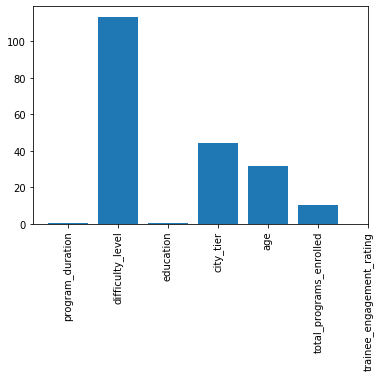

In [12]:
feature = pd.get_dummies(feature,sparse=False)
from sklearn.feature_selection import SelectKBest, f_classif # 特征选择库
predictors = [ 'program_duration',
       'difficulty_level', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 
       'trainee_engagement_rating']
# 'id_num', , 'trainee_id', 'test_id', 'test_type', 'gender','is_handicapped',,'program_id','program_type',
selector = SelectKBest(f_classif, k='all') 
# f_classif：基于方差分析的检验统计f值，根据k个最高分数选择功能
selector.fit(feature[predictors], target)

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [13]:
# 分数据集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature,target,test_size=0.2,random_state=42)

In [14]:
# from sklearn.preprocessing import MinMaxScaler
# mm = MinMaxScaler()
# x_train = mm.fit_transform(x_train)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as kNN
knn = kNN(n_neighbors=25)
cross_val_score(knn,x_train,y_train,cv=10).mean()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
cross_val_score(lr,x_train,y_train,cv=10).mean()

0.7086872911784153

0.71206335471814

In [16]:
from sklearn.linear_model import LinearRegression # 导入线性回归的类，采用二分类进行分类预测
from sklearn.model_selection import KFold # K折交叉验证，取平均，调参

predictors = ['program_duration', 'difficulty_level', 'education', 'city_tier', 'age',
       'total_programs_enrolled', 'trainee_engagement_rating', 'S', 'T', 'U',
       'V', 'X', 'Y', 'Z'] # 输入机器学习算法的特征
alg = LinearRegression() # 初始化线性回归类
kf = KFold(n_splits=9, random_state=666) # KFold类实例化
# kf.get_n_splits(titanic) # 交叉验证集的拆分迭代次数

predictions = []

# 有3次for循环，每次建立一个回归模型
for train, test in kf.split(x_train):
    train_predictors = (x_train[predictors].iloc[train,:]) # 取出训练数据
    train_target = y_train.iloc[train] # 获取到数据集中交叉分类好的标签，即是否活了下来
    alg.fit(train_predictors, train_target) # 训练模型
    test_predictions = alg.predict(x_train[predictors].iloc[test,:]) # 检验模型误差
    predictions.append(test_predictions)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# predictions = np.concatenate(predictions, axis=0) # 转换成数组，才能比较大小

# # 使用线性回归得到的结果是在区间[0,1]上的某个值，需要将该值转换成0或1
# predictions[predictions > 0.5] = 1
# predictions[predictions <= 0.5] = 0

# print("测试数据的总数量：", len(predictions))
# print("正确的数量：", sum(predictions == y_train))
# accuracy = sum(predictions == y_train) / len(predictions)
# print("准确率为：", accuracy)

In [18]:
# lr = LogisticRegression(C=0.2, penalty='l2', tol=0.0001,solver='liblinear')
# lr.fit(x_train,y_train)
# lr_y_predict = lr.predict(x_test)
# lr.score(x_test,y_test)

In [19]:
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier as kNN
# scores = []
# ks = []
# for k in range(66,76):
#     knn = kNN(n_neighbors=k)
#     score = cross_val_score(knn,x_train,y_train,cv=5).mean()
#     scores.append(score)
#     ks.append(k)
# plt.plot(ks,scores)

In [20]:
# scores_arr = np.array(scores)
# ks_arr = np.array(ks)

In [21]:
# scores_arr

In [22]:
# num = scores_arr.argmax()

In [23]:
# k_finial = ks_arr[num]
# k_finial

In [24]:
knn = kNN(n_neighbors=25).fit(x_train, y_train)
predictions = knn.predict(x_test)
accuracy = sum(predictions == y_test) / len(predictions)
accuracy

0.7099107788762962

In [25]:
pridc = pd.read_csv('./data/test/test2.csv')
pridc.shape
# 去除无用数据
pridc = pridc.drop('id_num', axis =1)
pridc = pridc.drop('trainee_id', axis =1)
pridc = pridc.drop('test_type', axis =1)
pridc = pridc.drop('gender', axis =1)
pridc = pridc.drop('is_handicapped',axis =1)
pridc = pridc.drop('test_id',axis =1)
pridc = pridc.drop('program_id',axis =1)
pridc = pridc.drop('is_pass',axis =1)
pridc.shape
pridc.columns
# 字符串转数字
pridc.loc[pridc['difficulty_level'] == 'easy', "difficulty_level"] = 1
pridc.loc[pridc['difficulty_level'] == 'intermediate', "difficulty_level"] = 2
pridc.loc[pridc['difficulty_level'] == 'hard', "difficulty_level"] = 3
pridc.loc[pridc['difficulty_level'] == 'vary hard', "difficulty_level"] = 4
pridc.loc[pridc['education'] == 'No Qualification',"education"] = 1
pridc.loc[pridc['education'] == 'High School Diploma',"education"] = 2
pridc.loc[pridc['education'] == 'Matriculation',"education"] =3
pridc.loc[pridc['education'] == 'Bachelors',"education"] = 4
pridc.loc[pridc['education'] == 'Masters',"education"] = 5
pridc_gain = pd.get_dummies(pridc['program_type'],sparse=False)
pridc = pd.concat([pridc, pridc_gain], axis=1)
pridc = pridc.drop('program_type',axis=1)

(11465, 16)

(11465, 8)

Index(['program_type', 'program_duration', 'difficulty_level', 'education',
       'city_tier', 'age', 'total_programs_enrolled',
       'trainee_engagement_rating'],
      dtype='object')

In [26]:
# msno.matrix(pridc)
# pridc.columns
# pridc.shape
# pridc

In [27]:
pridc.describe()
pridc.shape
pridc['age'] = pridc['age'].fillna(pridc['age'].mean())
pridc['trainee_engagement_rating'] = pridc['trainee_engagement_rating'].fillna(pridc['trainee_engagement_rating'].median())

,program_duration,difficulty_level,education,city_tier,age,total_programs_enrolled,trainee_engagement_rating,S,T,U,V,X,Y,Z
count,11465.000000,11465.000000,11465.000000,11465.000000,7068.000000,11465.000000,11451.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000
mean,128.179067,1.644047,2.686786,2.232708,36.352292,2.581771,2.382150,0.019712,0.255822,0.107196,0.180375,0.045792,0.303445,0.087658
std,6.890919,0.825828,0.764614,1.012618,8.993219,1.229564,1.314206,0.139015,0.436341,0.309376,0.384516,0.209042,0.459766,0.282809
min,117.000000,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,1.000000,2.000000,1.000000,28.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,131.000000,1.000000,3.000000,2.000000,39.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.000000,2.000000,3.000000,3.000000,45.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,136.000000,4.000000,5.000000,4.000000,59.000000,12.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(11465, 14)

In [28]:
pridc.describe()

,program_duration,difficulty_level,education,city_tier,age,total_programs_enrolled,trainee_engagement_rating,S,T,U,V,X,Y,Z
count,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000
mean,128.179067,1.644047,2.686786,2.232708,36.352292,2.581771,2.381683,0.019712,0.255822,0.107196,0.180375,0.045792,0.303445,0.087658
std,6.890919,0.825828,0.764614,1.012618,7.060975,1.229564,1.313471,0.139015,0.436341,0.309376,0.384516,0.209042,0.459766,0.282809
min,117.000000,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,1.000000,2.000000,1.000000,30.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,131.000000,1.000000,3.000000,2.000000,36.352292,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.000000,2.000000,3.000000,3.000000,43.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,136.000000,4.000000,5.000000,4.000000,59.000000,12.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
result1 = knn.predict(pridc)
# result1 = lr.predict(result1)
# result1 = alg.predict(pridc)
# result1 = result1.astype(np.uint8)
# result1[result1 > 0.5] = 1
# result1[result1 <= 0.5] = 0

In [30]:
result1[:500]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [31]:
# data = pd.read_csv('./data/submission/submission2.csv')
# data['is_pass'] = result1
# data.to_csv('./data/submission2.csv',mode = 'w')